In [1]:
from library.analysis import loadDataset, testSets
#from library.exercise import plotCloud
from library.generators.XConvGeN import XConvGeN, GeneratorConfig
from library.timing import timing
from fdc.fdc import FDC
import numpy as np
import tensorflow as tf

In [48]:
data = loadDataset(testSets[9])

Load 'folding_shuttle-2_vs_5'
from pickle file
Data loaded.


In [49]:
print((len(data.data), len(data.data0), len(data.data1)))

(3316, 3267, 49)


In [50]:
for n in range(data.data1.shape[1]):
    s = list(set(data.data1[:,n]))
    s.sort()
    if len(s) <= 10:
        print(f"{n}: {s}")
    else:
        print(f"{n}: {min(s):0.3f} .. {sum(s) / len(s):0.3f} .. {max(s):0.3f}: {s[:10]}...")

0: 40.000 .. 54.773 .. 72.000: [40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0]...
1: 21.000 .. 45.556 .. 92.000: [21.0, 22.0, 23.0, 24.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0]...
2: [77.0, 79.0, 80.0, 82.0]
3: [0.0]
4: [-42.0, -40.0, -22.0, 28.0, 34.0, 42.0]
5: -8.000 .. 1.545 .. 28.000: [-8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 25.0]...
6: 10.000 .. 25.000 .. 38.000: [10.0, 11.0, 12.0, 13.0, 14.0, 16.0, 18.0, 20.0, 22.0, 23.0]...
7: [37.0, 46.0, 48.0, 101.0, 123.0, 126.0]
8: 6.000 .. 55.545 .. 116.000: [6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0]...


In [51]:
fdc = FDC()
#fdc.nom_list = [0]
#fdc.cont_list = list(range(data.data0.shape[1]))[1:]
#fdc.nom_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,21,23]
#fdc.ord_list = [0,14,16,18,20,22,24]
#fdc.cont_list = None
fdc.cont_list = list(range(data.data0.shape[1]))

In [52]:
config = GeneratorConfig(n_feat=data.data0.shape[1], neb=5, genAddNoise=False)
gen = XConvGeN(config=config, fdc=fdc, debug=True)

In [53]:
gen.reset(data.data)

neb=5, gen=5
Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 5, 9)]       0           []                               
                                                                                                  
 UnsharpenInput (Conv1D)        (None, 3, 9)         252         ['input_13[0][0]']               
                                                                                                  
 InputMatrixToVector (Flatten)  (None, 27)           0           ['UnsharpenInput[0][0]']         
                                                                                                  
 P5_dense (Dense)               (None, 25)           700         ['InputMatrixToVector[0][0]']    
                                                                              

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 0.85782 / 0.858s
FDC.normalize (clustering ORD): 0.00007 / 0.858s
FDC.normalize (clustering NOM): 0.00001 / 0.858s
FDC.normalize (concat): 0.00001 / 0.858s
FDC.normalize (total): 0.00001 / 0.858s


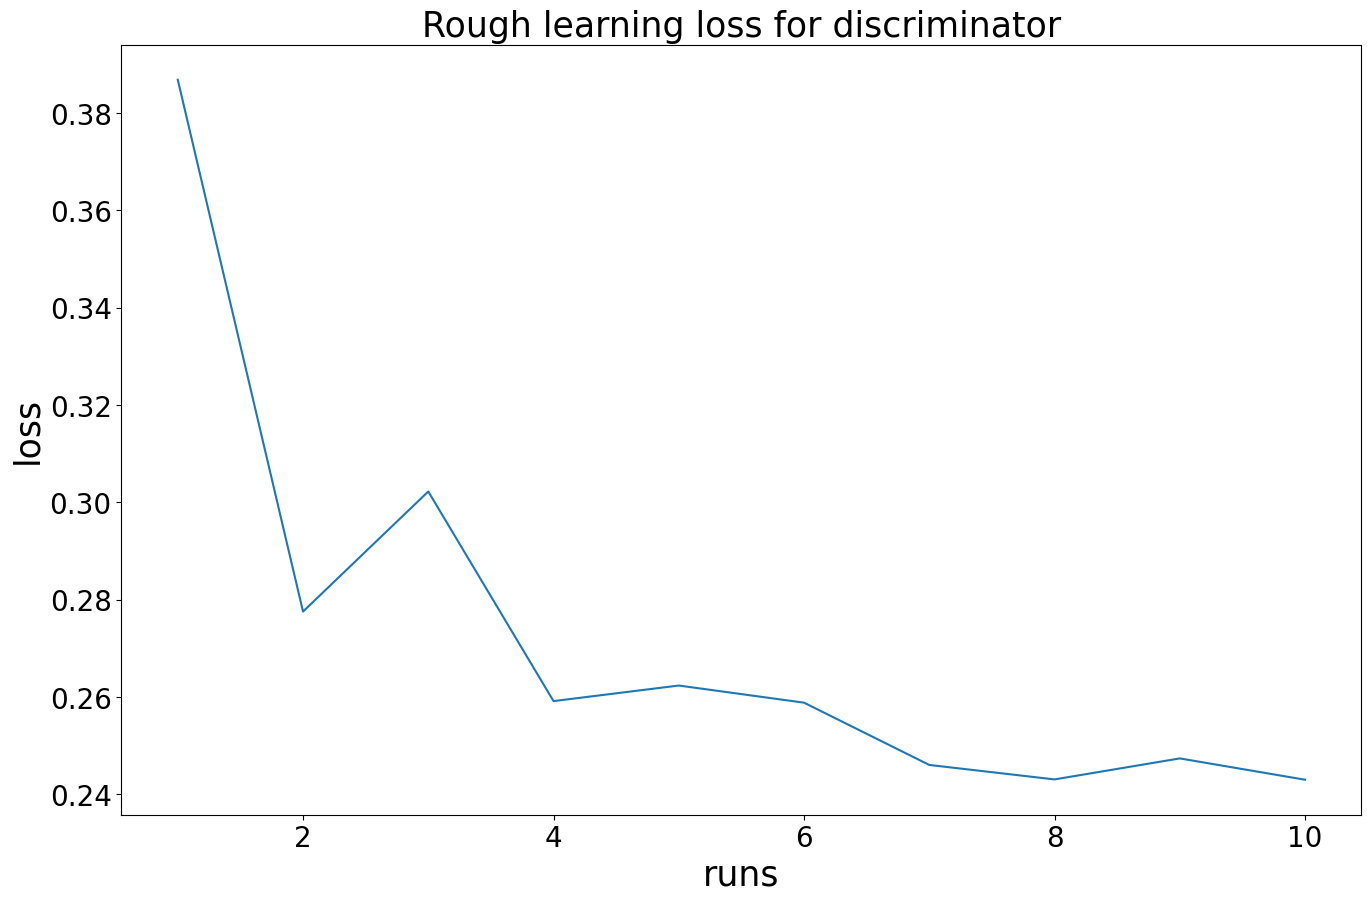

train: #1 22.8699s


In [54]:
t = timing("train")
t.start()
gen.train(data.data1)
t.stop()
print(t)

# train: #1 225.9655s

In [55]:
syntheticPoints = gen.generateData(data.data1.shape[0])

In [56]:
for x in syntheticPoints[:5]:
    print(x)

[ 51.441696  47.762924  79.60039    0.       -32.40154   -4.160616
  28.638615 114.00192   85.84323 ]
[ 62.  66.  82.   0. -42.  -8.  20. 126. 106.]
[ 51.   47.   79.5   0.  -32.   -4.   29.  113.5  85. ]
[ 53.66661    36.333267   78.66666     0.        -28.666622   -1.3333249
  25.666708  109.333275   83.9999   ]
[ 56.5  45.   79.5   0.  -32.   -4.   23.5 113.5  90. ]


In [57]:
for n in range(data.data1.shape[1]):
    s = list(set(data.data1[:,n]))
    s.sort()
    if len(s) <= 10:
        print(f"{n}: {s}")
    else:
        print(f"{n}: {min(s):0.3f} .. {sum(s) / len(s):0.3f} .. {max(s):0.3f}: {s[:10]}...")

0: 40.000 .. 54.773 .. 72.000: [40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0]...
1: 21.000 .. 45.556 .. 92.000: [21.0, 22.0, 23.0, 24.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0]...
2: [77.0, 79.0, 80.0, 82.0]
3: [0.0]
4: [-42.0, -40.0, -22.0, 28.0, 34.0, 42.0]
5: -8.000 .. 1.545 .. 28.000: [-8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 25.0]...
6: 10.000 .. 25.000 .. 38.000: [10.0, 11.0, 12.0, 13.0, 14.0, 16.0, 18.0, 20.0, 22.0, 23.0]...
7: [37.0, 46.0, 48.0, 101.0, 123.0, 126.0]
8: 6.000 .. 55.545 .. 116.000: [6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0]...


In [61]:
import math
dists = [min([math.sqrt(sum(y*y)) for y in (data.data1 - p) ]) for p in syntheticPoints]
print( min(dists), sum(dists) / len(dists), max(dists) )
[x for (d, x) in zip(dists, syntheticPoints) if d == 0]

0.0 7.356263197381008 26.551836094703507


[array([ 62.,  66.,  82.,   0., -42.,  -8.,  20., 126., 106.],
       dtype=float32),
 array([ 68.,  67.,  82.,   0., -42.,  -6.,  13., 126., 112.],
       dtype=float32),
 array([49., 28., 77.,  0., 28.,  0., 28., 48., 20.], dtype=float32),
 array([ 50.,  23.,  77.,   0., -22.,   0.,  27., 101.,  74.],
       dtype=float32),
 array([ 62.,  66.,  82.,   0., -42.,  -8.,  20., 126., 106.],
       dtype=float32),
 array([44., 28., 77.,  0., 28.,  0., 33., 48., 16.], dtype=float32),
 array([41., 21., 77.,  0., 28.,  0., 36., 48., 12.], dtype=float32),
 array([ 72.,  30.,  82.,   0., -42.,  -3.,  10., 126., 116.],
       dtype=float32),
 array([41., 21., 77.,  0., 28.,  0., 36., 48., 12.], dtype=float32)]

In [68]:
for nbh in gen.nmbMin.neighbourhoods:
    n = nbh[0]
    x = data.data1[n]
    d = []
    for i in nbh[1:]:
        y = data.data1[i]
        d.append(abs(sum(x-y)))
    d.sort()
    print(f"{n}: {d}")

0: [1.0, 9.0, 13.0, 81.0]
1: [2.0, 2.0, 2.0, 4.0]
2: [1.0, 6.0, 14.0, 41.0]
3: [6.0, 8.0, 20.0, 35.0]
4: [1.0, 4.0, 6.0, 7.0]
5: [3.0, 12.0, 80.0, 86.0]
6: [2.0, 7.0, 8.0, 33.0]
7: [2.0, 3.0, 15.0, 110.0]
8: [0.0, 1.0, 40.0, 76.0]
9: [1.0, 2.0, 3.0, 90.0]
10: [7.0, 8.0, 14.0, 18.0]
11: [27.0, 35.0, 41.0, 55.0]
12: [2.0, 9.0, 11.0, 14.0]
13: [0.0, 1.0, 5.0, 81.0]
14: [1.0, 1.0, 4.0, 5.0]
15: [4.0, 9.0, 12.0, 90.0]
16: [3.0, 5.0, 12.0, 14.0]
17: [1.0, 6.0, 35.0, 41.0]
18: [5.0, 6.0, 8.0, 10.0]
19: [4.0, 10.0, 11.0, 18.0]
20: [7.0, 13.0, 14.0, 16.0]
21: [0.0, 1.0, 40.0, 76.0]
22: [1.0, 1.0, 2.0, 6.0]
23: [1.0, 6.0, 36.0, 40.0]
24: [3.0, 20.0, 38.0, 55.0]
25: [0.0, 2.0, 4.0, 6.0]
26: [11.0, 30.0, 35.0, 36.0]
27: [5.0, 5.0, 6.0, 86.0]
28: [3.0, 6.0, 30.0, 41.0]
29: [2.0, 3.0, 9.0, 11.0]
30: [1.0, 2.0, 7.0, 14.0]
31: [4.0, 6.0, 6.0, 15.0]
32: [0.0, 2.0, 4.0, 6.0]
33: [1.0, 1.0, 77.0, 88.0]
34: [1.0, 3.0, 4.0, 6.0]
35: [75.0, 78.0, 82.0, 88.0]
36: [1.0, 3.0, 6.0, 13.0]
37: [8.0, 13.0, 14.0, 2

In [59]:
v = gen.predictReal(data.data1)
(min(v), max(v), sum(v) / len(v))

(0.23034507, 0.5882944, 0.4777390719676504)

In [ ]:
#plotCloud(data.data1, syntheticPoints)